In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
real = pd.read_csv('./data/True.csv')
fake = pd.read_csv('./data/Fake.csv')

In [3]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
real['fake'] = False
fake['fake'] = True

combined = pd.concat([real, fake], axis=0)
combined.sample(5)

,title,text,subject,date,fake
14382,FOX NEWS FREEFALL? BILL O’REILLY Loses Kids Fo...,FOX News has seen their ratings take a nose-di...,politics,"Mar 1, 2016",True
3302,Obama Just Completely F*cked Over Trump’s ‘Mu...,Donald Trump was really looking forward to usi...,News,"December 22, 2016",True
17710,JUST IN: Former DNC Chair Donna Brazile Accuse...,After months of lying about passing debate que...,left-news,"Nov 2, 2017",True
2966,Two faces of Maine politics show rifts in stat...,(Reuters) - Maine’s two most prominent Republi...,politicsNews,"June 29, 2017",False
11469,SLEEZY DEMOCRAT SENATOR Caught Fabricating Sto...,Liberal Delaware Sen. Chris Coons caused a sti...,politics,"Mar 7, 2017",True


In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.8+ MB


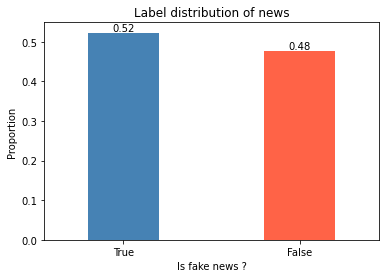

In [11]:
def plot_target_dist(data):
    label_dist = data['fake'].value_counts(normalize=True).reset_index()
    ax = label_dist.plot.bar(y='fake', x='index', color=["steelblue", 'tomato'], width=.4)
    ax.bar_label(ax.containers[0], padding=0, fmt='%.2f')
    ax.get_legend().remove()
    plt.xlabel('Is fake news ?')
    plt.ylabel('Proportion')
    plt.title('Label distribution of news')
    plt.xticks(rotation=0)
    plt.show()
    
plot_target_dist(combined)

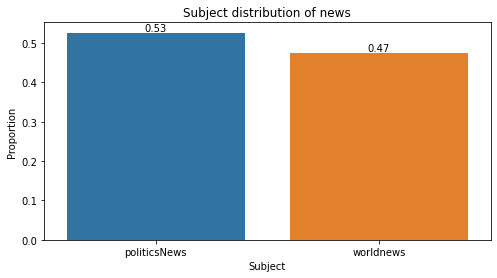

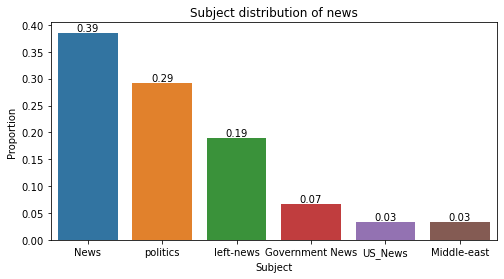

In [15]:
def plot_subject_dist(data):
    subject_dist = data['subject'].value_counts(normalize=True).reset_index()
    plt.figure(figsize=(8,4))
    ax = sns.barplot(y='subject', x='index', data=subject_dist)
    ax.bar_label(ax.containers[0], fmt='%.2f')
    plt.xlabel('Subject')
    plt.ylabel('Proportion')
    plt.title('Subject distribution of news')
    plt.xticks(rotation=0)
    plt.show()

plot_subject_dist(real)
plot_subject_dist(fake)

In [29]:
def plot_word_count_distribution(texts):
    plt.figure(figsize=(8, 5))
    sns.histplot(texts.apply(lambda x: len(x.split())), stat="density", bins=30)
    plt.title('Word count distribution')
    plt.xlabel("Word count interval")


def plot_avg_word_len_distribution(texts):
    get_avg_word_len = lambda x: np.average([len(word) for word in x.split()])
    plt.figure(figsize=(8, 5))
    sns.histplot(texts.apply(lambda x: get_avg_word_len(x)), stat="density", bins=30)
    plt.xlabel("Average word length interval")
    plt.title('Average word length distribution')

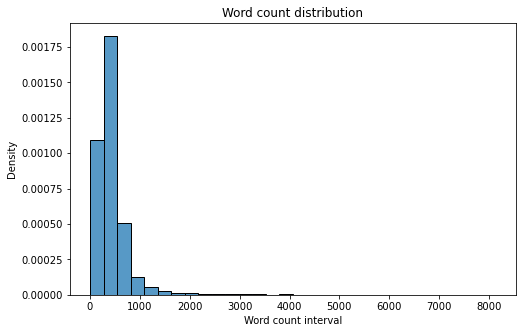

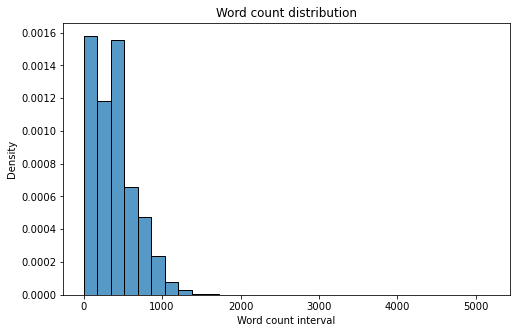

In [30]:
plot_word_count_distribution(fake.text)
plot_word_count_distribution(real.text)

/Users/apple/opt/anaconda3/envs/my_env/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/apple/opt/anaconda3/envs/my_env/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


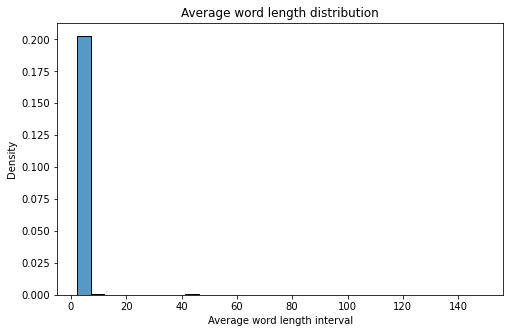

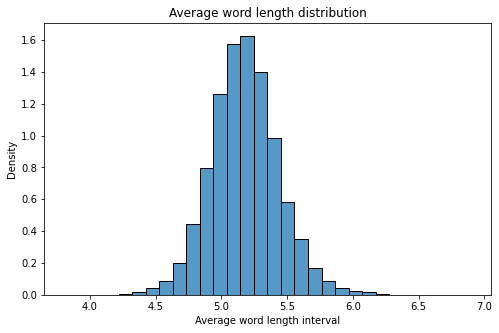

In [31]:
plot_avg_word_len_distribution(fake.text)
plot_avg_word_len_distribution(real.text)

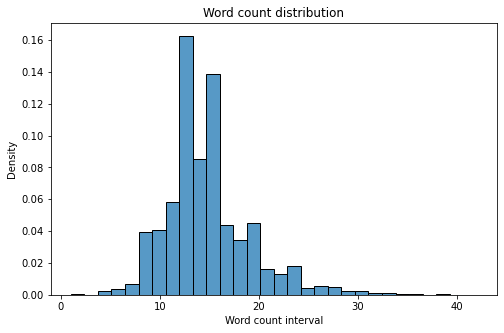

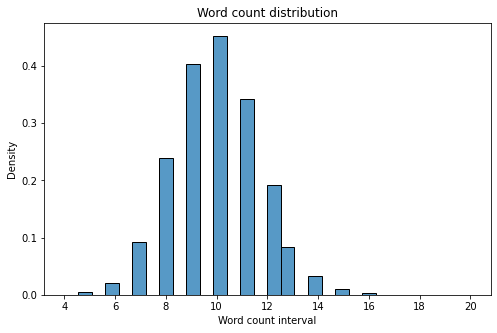

In [32]:
plot_word_count_distribution(fake.title)
plot_word_count_distribution(real.title)

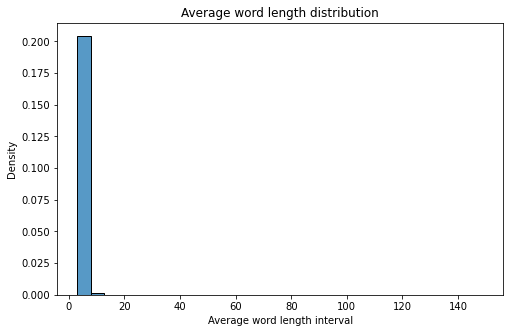

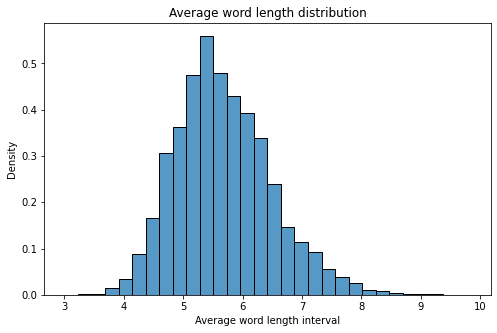

In [33]:
plot_avg_word_len_distribution(fake.title)
plot_avg_word_len_distribution(real.title)